# 종합지표_학교폭력위험도_시각화

In [1]:
import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import plugins
import seaborn as sns

C:\Users\ppi06\anaconda3\envs\data_venv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# 그래프 시각화 라이브러리 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import pandas as pd
import seaborn as sns
import numpy as np
import folium
import json

# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

# if platform.system() == 'Darwin':  # 맥OS 
#     rc('font', family='AppleGothic')
# elif platform.system() == 'Windows':  # 윈도우
#     path = "c:/Windows/Fonts/malgun.ttf"
#     font_name = font_manager.FontProperties(fname=path).get_name()
#     rc('font', family=font_name)
# else:
#     print('Unknown system...  sorry~~~')

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity="all"

import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 
#그래프는 show()함수를 통해서 독립창에서 실행되는 것이 원칙
#그래프를 콘솔에서 바로 작도되록 하는 설정

In [3]:
# 한글폰트사용
from matplotlib import font_manager,rc
font_path = "C:/sooeun/DATAexam/ConvergenceProject-School_Violence/Font/a타이틀고딕2.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()

In [4]:
plt.style.use("default")
plt.rc('font', family = font_name)
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기 

In [5]:
data_path = "C:/sooeun/DATAexam/ConvergenceProject-School_Violence/Data/"

In [6]:
school_all = pd.read_csv(data_path + "DB_서울특별시_고등학교_학교폭력_종합지표_features.csv",index_col=0)
school_all.columns

Index(['학교명', '시군구', '한부모가족지원법수급자_재가보호_가구원수', '국민기초생활보장법수급자_가구원수',
       '소득인식수준_중간소득', '소득인식수준_고소득', '성인게임장수', '사건종별가정폭력', '사건종별데이트폭력',
       '월평균소득금액(백만)', '다문화가족', '환경지표_score', '환경지표_cluster', '환경지표_학교폭력위험도',
       '교실안', '신체폭력', '집단따돌림', '쉬는시간', '500m_inner_Harmful_dept', '위해지표_score',
       '위해지표_cluster', '위해지표_학교폭력위험도', '평균 교육 시간(1학급당)',
       '500m_inner_police_dept', '500m_inner_cctv', '경감지표_score',
       '경감지표_cluster', '경감지표_학교폭력위험도', 'total_score', '종합_위험도'],
      dtype='object')

In [9]:
school_all_df = school_all[['학교명','total_score']]
school_all_df

,학교명,total_score
0,가락고등학교,46.644883
1,가재울고등학교,69.267431
2,강동고등학교,61.951835
3,강서고등학교,53.821642
4,강서공업고등학교,61.432352
...,...,...
315,효문고등학교,74.041027
316,휘경공업고등학교,51.431740
317,휘경여자고등학교,69.380762
318,휘문고등학교,24.599284


In [15]:
data_m = school_all_df[(school_all_df['total_score'] > 61.481197)]
data_m['total_score'].max()
data_m = data_m.sort_values(by=["total_score"], ascending=[False]) 
data_m

,학교명,total_score
105,미양고등학교,100.000000
190,송곡고등학교,96.536603
250,이화여자대학교병설미디어고등학교,96.536603
183,성암국제무역고등학교,93.683366
308,혜화여자고등학교,93.683366
...,...,...
154,서울외국어고등학교,62.075012
280,창동고등학교,62.075012
2,강동고등학교,61.951835
148,서울신정고등학교,61.765979


if score>71.747387: return '매우위험'
elif score>61.481197: return '위험'

# 학교폭력위험점수 시각화

In [16]:
order_lst = data_m['학교명'].tolist()
order_lst

['미양고등학교',
 '송곡고등학교',
 '이화여자대학교병설미디어고등학교',
 '성암국제무역고등학교',
 '혜화여자고등학교',
 '문일고등학교',
 '서울문화고등학교',
 '정의여자고등학교',
 '도봉고등학교',
 '원묵고등학교',
 '영훈고등학교',
 '구암고등학교',
 '삼성고등학교',
 '서울여자상업고등학교',
 '광신고등학교',
 '광신방송예술고등학교',
 '한광고등학교',
 '동양고등학교',
 '누원고등학교',
 '세그루패션디자인고등학교',
 '신도고등학교',
 '대성고등학교',
 '하나고등학교',
 '월계고등학교',
 '영신여자고등학교',
 '구일고등학교',
 '경인고등학교',
 '신도림고등학교',
 '삼각산고등학교',
 '금천고등학교',
 '덕원여자고등학교',
 '경복여자고등학교',
 '화곡고등학교',
 '수명고등학교',
 '경복비즈니스고등학교',
 '양정고등학교',
 '신목고등학교',
 '백암고등학교',
 '금옥여자고등학교',
 '한가람고등학교',
 '송곡관광고등학교',
 '혜원여자고등학교',
 '진관고등학교',
 '숭실고등학교',
 '면목고등학교',
 '혜성여자고등학교',
 '대진여자고등학교',
 '청원여자고등학교',
 '불암고등학교',
 '상계고등학교',
 '창문여자고등학교',
 '효문고등학교',
 '상일여자고등학교',
 '한영고등학교',
 '한영외국어고등학교',
 '광문고등학교',
 '등촌고등학교',
 '명덕외국어고등학교',
 '영등포공업고등학교',
 '인헌고등학교',
 '미림여자고등학교',
 '당곡고등학교',
 '선덕고등학교',
 '신현고등학교',
 '선일빅데이터고등학교',
 '선일여자고등학교',
 '신진과학기술고등학교',
 '선정고등학교',
 '예일디자인고등학교',
 '충암고등학교',
 '보성고등학교',
 '잠신고등학교',
 '잠실여자고등학교',
 '방산고등학교',
 '대원외국어고등학교',
 '대원고등학교',
 '서울공연예술고등학교',
 '예림디자인고등학교',
 '신일고등학교',
 '구로고등학교',
 '고척고등학교',
 '휘경여자고등학교

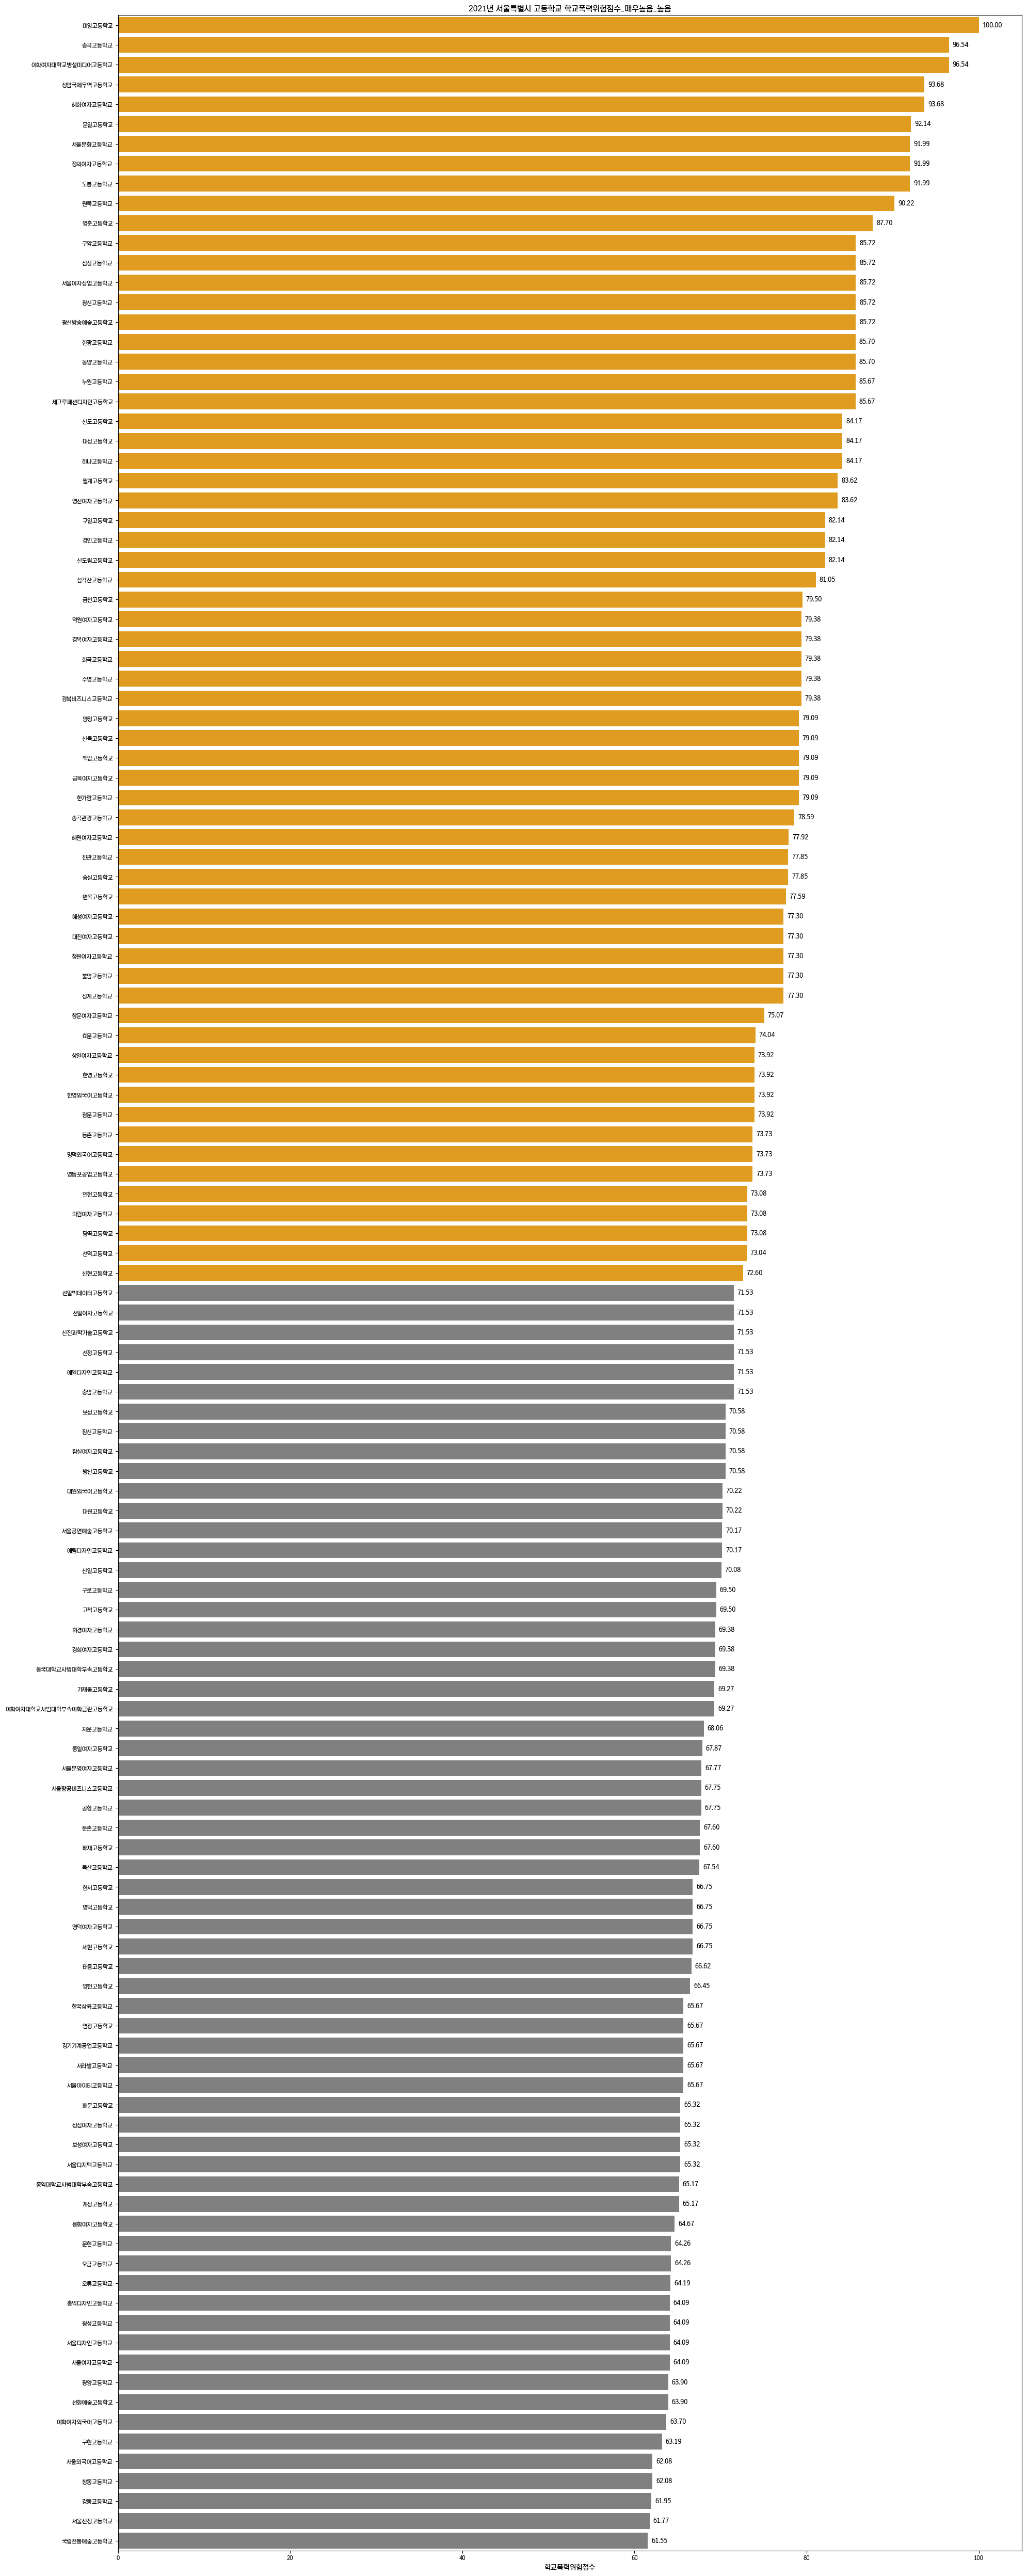

In [20]:
# 시각화
fig, ax = plt.subplots()
fig.set_size_inches(20,50)


cols = ['grey' if (x < 71.747387) else 'orange' for x in data_m.total_score]
# palette='Set3'
# palette=cols

splot = sns.barplot(data = data_m, y='학교명', x ='total_score', order = order_lst, palette=cols)
ax.set_title('2021년 서울특별시 고등학교 학교폭력위험점수_매우높음_높음', size = 11)
ax.set_xlabel('학교폭력위험점수')
ax.set_ylabel('학교명')
plt.yticks(size = 8)
plt.xticks(size = 8)
ax.set_ylabel('')

for p in splot.patches:
    ax.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 9)

### 천단위 콤마 표시(x축)
import matplotlib.ticker as tkr
def xfunc(x, pos):
    s = '{:0,d}'.format(int(x))
    return s
x_format = tkr.FuncFormatter(xfunc)
ax.xaxis.set_major_formatter(x_format)

plt.tight_layout()
plt.savefig(data_path + "DB_서울특별시_고등학교_학교폭력_종합지표_시각화.png",dpi=300)
plt.show()

In [26]:
school_all = school_all[['학교명','시군구','환경지표_score', '환경지표_cluster', '환경지표_학교폭력위험도','위해지표_score',
       '위해지표_cluster', '위해지표_학교폭력위험도','경감지표_score',
       '경감지표_cluster', '경감지표_학교폭력위험도', 'total_score', '종합_위험도']]

In [28]:
region = pd.read_csv(data_path + "DB_서울특별시_고등학교_학교폭력_환경지표.csv",index_col=0)
region.columns

Index(['시군구', '환경지표_score', '환경지표_cluster', '환경지표_학교폭력위험도'], dtype='object')

# 서울특별시 시군구 -> 환경지표에 따른 서울특별시 시군구의 학교폭력위험도는 어떠한가?

In [42]:
region = region.sort_values(by='환경지표_score', ascending=False)

In [43]:
order_lst = region['시군구'].tolist()
order_lst

['강북구',
 '중랑구',
 '금천구',
 '도봉구',
 '관악구',
 '강서구',
 '은평구',
 '노원구',
 '구로구',
 '양천구',
 '광진구',
 '동대문구',
 '강동구',
 '성북구',
 '송파구',
 '서대문구',
 '동작구',
 '용산구',
 '성동구',
 '마포구',
 '중구',
 '종로구',
 '영등포구',
 '서초구',
 '강남구']

Text(0.5, 1.0, '2021년 서울특별시 고등학교 환경지표')

Text(0.5, 0, '서울특별시 시군구')

Text(0, 0.5, '환경지표 점수')

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '강북구'),
  Text(1, 0, '중랑구'),
  Text(2, 0, '금천구'),
  Text(3, 0, '도봉구'),
  Text(4, 0, '관악구'),
  Text(5, 0, '강서구'),
  Text(6, 0, '은평구'),
  Text(7, 0, '노원구'),
  Text(8, 0, '구로구'),
  Text(9, 0, '양천구'),
  Text(10, 0, '광진구'),
  Text(11, 0, '동대문구'),
  Text(12, 0, '강동구'),
  Text(13, 0, '성북구'),
  Text(14, 0, '송파구'),
  Text(15, 0, '서대문구'),
  Text(16, 0, '동작구'),
  Text(17, 0, '용산구'),
  Text(18, 0, '성동구'),
  Text(19, 0, '마포구'),
  Text(20, 0, '중구'),
  Text(21, 0, '종로구'),
  Text(22, 0, '영등포구'),
  Text(23, 0, '서초구'),
  Text(24, 0, '강남구')])

Text(0, 6, '105')

Text(0, 6, '98')

Text(0, 6, '90')

Text(0, 6, '89')

Text(0, 6, '77')

Text(0, 6, '77')

Text(0, 6, '74')

Text(0, 6, '73')

Text(0, 6, '70')

Text(0, 6, '65')

Text(0, 6, '60')

Text(0, 6, '58')

Text(0, 6, '55')

Text(0, 6, '50')

Text(0, 6, '48')

Text(0, 6, '46')

Text(0, 6, '41')

Text(0, 6, '38')

Text(0, 6, '38')

Text(0, 6, '36')

Text(0, 6, '35')

Text(0, 6, '32')

Text(0, 6, '25')

Text(0, 6, '20')

Text(0, 6, '19')

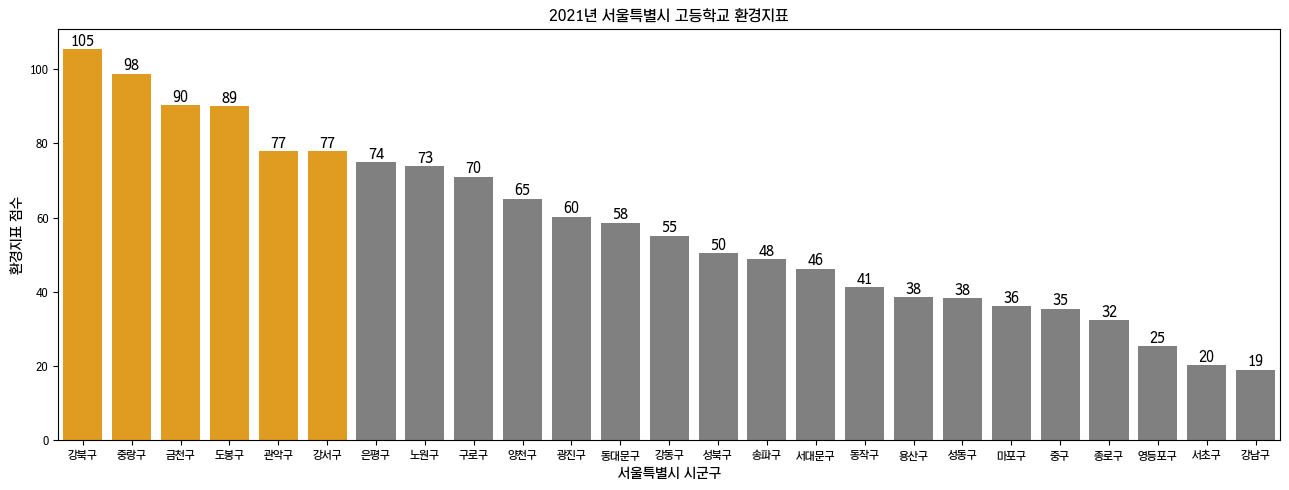

In [45]:
# 시각화
fig, ax = plt.subplots()
fig.set_size_inches(13, 5)


cols = ['grey' if (x < 77) else 'orange' for x in region.환경지표_score]
# palette = sns.color_palette() 
# palette.reverse() # 색상 진한 정도 거꾸로
# palette='Set3'
# palette=cols

splot = sns.barplot(data = region, x ='시군구', y='환경지표_score', order = order_lst, palette=cols)
ax.set_title('2021년 서울특별시 고등학교 환경지표', size = 11)
ax.set_xlabel('서울특별시 시군구')
ax.set_ylabel('환경지표 점수')
plt.yticks(size = 8)
plt.xticks(size = 8)

for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')

### 천단위 콤마 표시(x축)
import matplotlib.ticker as tkr
def yfunc(y, pos):
    s = '{:0,d}'.format(int(y))
    return s
y_format = tkr.FuncFormatter(yfunc)
ax.yaxis.set_major_formatter(y_format)

plt.tight_layout()
# plt.savefig("C:/sooeun/DATAexam/ConvergenceProject-School_Violence/Data/학교알리미_2021_고등학교_학교폭력_피해신고현황_시각화.png",dpi=300)
plt.show()

# 강남구

In [27]:
school_data1 = school_all[school_all['시군구'] == '강남구']
school_data1

,학교명,시군구,환경지표_score,환경지표_cluster,환경지표_학교폭력위험도,위해지표_score,위해지표_cluster,위해지표_학교폭력위험도,경감지표_score,경감지표_cluster,경감지표_학교폭력위험도,total_score,종합_위험도
6,개포고등학교,강남구,19.071217,3,매우낮음,40,4,보통,20,0,매우 안전하지 않음,37.232552,매우안전
8,경기고등학교,강남구,19.071217,3,매우낮음,0,0,매우 안전,100,1,매우 안전,0.000000,매우안전
11,경기여자고등학교,강남구,19.071217,3,매우낮음,40,4,보통,20,0,매우 안전하지 않음,37.232552,매우안전
42,국립국악고등학교,강남구,19.071217,3,매우낮음,100,1,매우 위험,100,1,매우 안전,29.915037,매우안전
50,단국대학교부속소프트웨어고등학교,강남구,19.071217,3,매우낮음,100,1,매우 위험,100,1,매우 안전,29.915037,매우안전
51,단국대학교사범대학부속고등학교,강남구,19.071217,3,매우낮음,100,1,매우 위험,100,1,매우 안전,29.915037,매우안전
66,대진디자인고등학교,강남구,19.071217,3,매우낮음,40,4,보통,20,0,매우 안전하지 않음,37.232552,매우안전
141,서울로봇고등학교,강남구,19.071217,3,매우낮음,100,1,매우 위험,80,2,안전,36.231671,매우안전
147,서울세종고등학교,강남구,19.071217,3,매우낮음,100,1,매우 위험,40,3,안전하지 않음,48.864940,안전
194,수도전기공업고등학교,강남구,19.071217,3,매우낮음,40,4,보통,20,0,매우 안전하지 않음,37.232552,매우안전


---

In [26]:
import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import plugins
import seaborn as sns

In [27]:
import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import plugins
print(folium.__version__)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
# %matplotlib inline 
#그래프는 show()함수를 통해서 독립창에서 실행되는 것이 원칙
#그래프를 콘솔에서 바로 작도되록 하는 설정

0.13.0


In [28]:
# 한글폰트사용
from matplotlib import font_manager,rc
font_path = "C:/sooeun/DATAexam/ConvergenceProject-School_Violence/Font/a타이틀고딕2.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()

In [29]:
plt.style.use("default")
plt.rc('font', family = font_name)
plt.rcParams['axes.unicode_minus'] = False

In [30]:
data_path = "C:/sooeun/DATAexam/ConvergenceProject-School_Violence/Data/"

In [31]:
school_info = pd.read_csv(data_path + "DB_서울특별시_고등학교_정보.csv",index_col=0)
school_info

,시도교육청코드,시도교육청명,표준학교코드,학교명,영문학교명,학교종류명,소재지명,시군구,관할조직명,설립명,...,고등학교구분명,산업체특별학급존재여부,고등학교일반실업구분명,특수목적고등학교계열명,입시전후기구분명,주야구분명,설립일자,개교기념일,위도,경도
0,B10,서울특별시교육청,7010057,가락고등학교,Garak High School,고등학교,서울특별시,송파구,서울특별시교육청,공립,...,일반고,N,일반계,NaN,후기,주간,19881223,19890428,37.501076,127.116426
1,B10,서울특별시교육청,7011169,가재울고등학교,Gajaeul High School,고등학교,서울특별시,서대문구,서울특별시교육청,공립,...,일반고,N,일반계,NaN,후기,주간,20130301,20130501,37.574364,126.909530
2,B10,서울특별시교육청,7010117,강동고등학교,Kangdong High School,고등학교,서울특별시,강동구,서울특별시교육청,사립,...,일반고,N,일반계,NaN,후기,주간,19841217,19850908,37.549917,127.160668
3,B10,서울특별시교육청,7010118,강서고등학교,Gangseo High School,고등학교,서울특별시,양천구,서울특별시교육청,사립,...,일반고,N,일반계,NaN,후기,주간,19831101,19831101,37.536316,126.865771
4,B10,서울특별시교육청,7010270,강서공업고등학교,Gangseo Technical High School,고등학교,서울특별시,강서구,서울특별시교육청,공립,...,특성화고,N,전문계,NaN,전기,주간,19940105,19940105,37.576034,126.816182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,B10,서울특별시교육청,7010766,효문고등학교,Hyomun High School,고등학교,서울특별시,도봉구,서울특별시교육청,공립,...,일반고,N,일반계,NaN,후기,주간,20051229,20060605,37.652699,127.018400
316,B10,서울특별시교육청,7010292,휘경공업고등학교,Hwigyeong Technical High School,고등학교,서울특별시,동대문구,서울특별시교육청,공립,...,특성화고,N,전문계,NaN,전기,주간,19971220,19980702,37.585153,127.069451
317,B10,서울특별시교육청,7010267,휘경여자고등학교,Hwikyung Girls` High School,고등학교,서울특별시,동대문구,서울특별시교육청,사립,...,일반고,N,일반계,NaN,후기,주간,19750303,19750519,37.581901,127.067434
318,B10,서울특별시교육청,7010268,휘문고등학교,Whimoon High School,고등학교,서울특별시,강남구,서울특별시교육청,사립,...,자율고,N,일반계,NaN,전기,주간,19060501,19060501,37.505289,127.061994


In [32]:
school_violence_hazard = pd.read_csv(data_path + "DB_서울특별시_고등학교_학교폭력_종합지표_features.csv",index_col=0)
school_violence_hazard

,학교명,시군구,한부모가족지원법수급자_재가보호_가구원수,국민기초생활보장법수급자_가구원수,소득인식수준_중간소득,소득인식수준_고소득,성인게임장수,사건종별가정폭력,사건종별데이트폭력,월평균소득금액(백만),...,위해지표_cluster,위해지표_학교폭력위험도,평균 교육 시간(1학급당),500m_inner_police_dept,500m_inner_cctv,경감지표_score,경감지표_cluster,경감지표_학교폭력위험도,total_score,종합_위험도
0,가락고등학교,송파구,10.587907,41.944982,61.9,21.3,10.0,4.611694,0.673981,39.69562,...,5,안전,147.75,0,102,20,0,매우 안전하지 않음,46.644883,안전
1,가재울고등학교,서대문구,16.758591,47.709712,46.9,20.2,5.0,3.501553,0.504236,39.43923,...,1,매우 위험,100.00,0,137,20,0,매우 안전하지 않음,69.267431,위험
2,강동고등학교,강동구,14.148759,48.663157,52.6,19.8,15.0,4.690014,0.769964,33.36210,...,2,주의,30.65,0,51,20,0,매우 안전하지 않음,61.951835,위험
3,강서고등학교,양천구,15.982703,58.270272,62.8,13.5,6.0,4.280519,0.412517,35.63309,...,1,매우 위험,237.30,1,299,100,1,매우 안전,53.821642,보통
4,강서공업고등학교,강서구,20.076996,67.130300,62.7,17.2,15.0,5.099763,1.060769,31.65221,...,4,보통,187.50,1,98,40,3,안전하지 않음,61.432352,보통
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,효문고등학교,도봉구,27.773168,85.260808,56.2,29.7,16.0,5.916945,0.840188,27.13315,...,4,보통,263.60,0,109,20,0,매우 안전하지 않음,74.041027,매우위험
316,휘경공업고등학교,동대문구,17.442884,53.493406,46.3,22.0,16.0,4.093672,0.909075,30.11303,...,4,보통,187.90,1,99,40,3,안전하지 않음,51.431740,안전
317,휘경여자고등학교,동대문구,17.442884,53.493406,46.3,22.0,16.0,4.093672,0.909075,30.11303,...,1,매우 위험,44.80,1,136,40,3,안전하지 않음,69.380762,위험
318,휘문고등학교,강남구,6.136110,30.717739,44.9,34.7,2.0,2.146930,1.160593,47.99007,...,4,보통,4.60,0,191,60,4,보통,24.599284,매우안전


In [33]:
school_map = pd.merge(school_info, school_violence_hazard, on=['학교명','시군구'], how='outer', sort=True)
school_map

,시도교육청코드,시도교육청명,표준학교코드,학교명,영문학교명,학교종류명,소재지명,시군구,관할조직명,설립명,...,위해지표_cluster,위해지표_학교폭력위험도,평균 교육 시간(1학급당),500m_inner_police_dept,500m_inner_cctv,경감지표_score,경감지표_cluster,경감지표_학교폭력위험도,total_score,종합_위험도
0,B10,서울특별시교육청,7010057,가락고등학교,Garak High School,고등학교,서울특별시,송파구,서울특별시교육청,공립,...,5,안전,147.75,0,102,20,0,매우 안전하지 않음,46.644883,안전
1,B10,서울특별시교육청,7011169,가재울고등학교,Gajaeul High School,고등학교,서울특별시,서대문구,서울특별시교육청,공립,...,1,매우 위험,100.00,0,137,20,0,매우 안전하지 않음,69.267431,위험
2,B10,서울특별시교육청,7010117,강동고등학교,Kangdong High School,고등학교,서울특별시,강동구,서울특별시교육청,사립,...,2,주의,30.65,0,51,20,0,매우 안전하지 않음,61.951835,위험
3,B10,서울특별시교육청,7010118,강서고등학교,Gangseo High School,고등학교,서울특별시,양천구,서울특별시교육청,사립,...,1,매우 위험,237.30,1,299,100,1,매우 안전,53.821642,보통
4,B10,서울특별시교육청,7010270,강서공업고등학교,Gangseo Technical High School,고등학교,서울특별시,강서구,서울특별시교육청,공립,...,4,보통,187.50,1,98,40,3,안전하지 않음,61.432352,보통
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,B10,서울특별시교육청,7010766,효문고등학교,Hyomun High School,고등학교,서울특별시,도봉구,서울특별시교육청,공립,...,4,보통,263.60,0,109,20,0,매우 안전하지 않음,74.041027,매우위험
316,B10,서울특별시교육청,7010292,휘경공업고등학교,Hwigyeong Technical High School,고등학교,서울특별시,동대문구,서울특별시교육청,공립,...,4,보통,187.90,1,99,40,3,안전하지 않음,51.431740,안전
317,B10,서울특별시교육청,7010267,휘경여자고등학교,Hwikyung Girls` High School,고등학교,서울특별시,동대문구,서울특별시교육청,사립,...,1,매우 위험,44.80,1,136,40,3,안전하지 않음,69.380762,위험
318,B10,서울특별시교육청,7010268,휘문고등학교,Whimoon High School,고등학교,서울특별시,강남구,서울특별시교육청,사립,...,4,보통,4.60,0,191,60,4,보통,24.599284,매우안전


In [34]:
school_map.rename(columns = {'위도':'lat','경도':'lon'},inplace=True)

In [35]:
# 저장 후 주석처리
# school_map.to_csv("C:/sooeun/DATAexam/ConvergenceProject-School_Violence/Data/DB_서울특별시_고등학교_학교폭력_종합지표_features_lat_lon.csv")

In [36]:
# ! pip install mapboxgl

In [37]:
with open("C:\sooeun\DATAexam\ConvergenceProject-School_Violence\Data\mapbox_tkn.txt", 'r') as f:
    mapbox_key = f.read().strip()

In [38]:
school_map.columns

Index(['시도교육청코드', '시도교육청명', '표준학교코드', '학교명', '영문학교명', '학교종류명', '소재지명', '시군구',
       '관할조직명', '설립명', '도로명우편번호', '도로명주소', '도로명상세주소', '전화번호', '홈페이지주소',
       '남녀공학구분명', '팩스번호', '고등학교구분명', '산업체특별학급존재여부', '고등학교일반실업구분명',
       '특수목적고등학교계열명', '입시전후기구분명', '주야구분명', '설립일자', '개교기념일', 'lat', 'lon',
       '한부모가족지원법수급자_재가보호_가구원수', '국민기초생활보장법수급자_가구원수', '소득인식수준_중간소득',
       '소득인식수준_고소득', '성인게임장수', '사건종별가정폭력', '사건종별데이트폭력', '월평균소득금액(백만)', '다문화가족',
       '환경지표_score', '환경지표_cluster', '환경지표_학교폭력위험도', '교실안', '신체폭력', '집단따돌림',
       '쉬는시간', '500m_inner_Harmful_dept', '위해지표_score', '위해지표_cluster',
       '위해지표_학교폭력위험도', '평균 교육 시간(1학급당)', '500m_inner_police_dept',
       '500m_inner_cctv', '경감지표_score', '경감지표_cluster', '경감지표_학교폭력위험도',
       'total_score', '종합_위험도'],
      dtype='object')

In [39]:
school_map.rename(columns = {'환경지표_학교폭력위험도':'환경지표','위해지표_학교폭력위험도':'위해지표','경감지표_학교폭력위험도':'경감지표','종합_위험도':'학교폭력위험도'},inplace=True)

In [40]:
school_map = school_map[['학교명','시군구','lat', 'lon','환경지표','위해지표','경감지표','total_score','학교폭력위험도']]

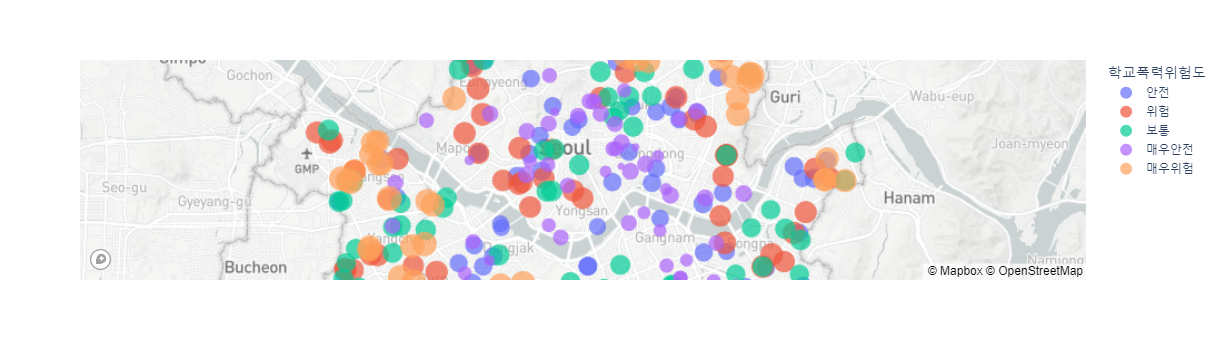

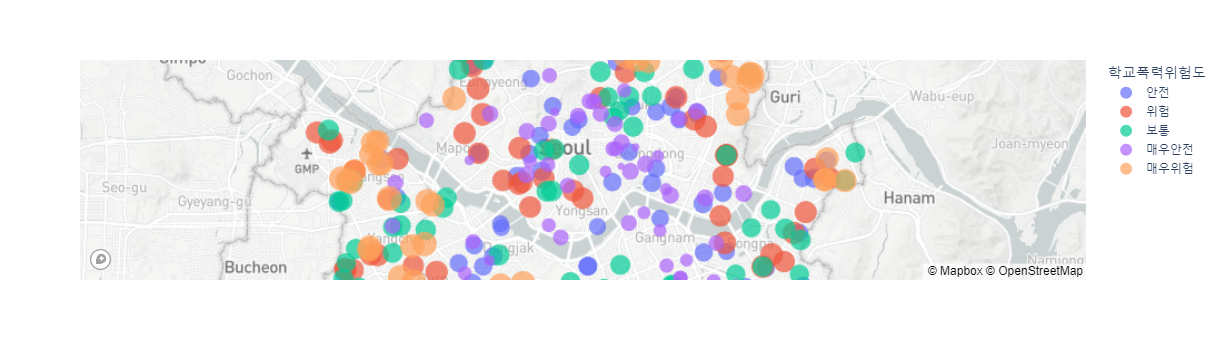

In [50]:
import plotly.express as px

fig = px.scatter_mapbox(school_map, lat="lat", lon="lon", color="학교폭력위험도",size="total_score",
                       zoom=10, size_max=20,hover_name='학교명', 
                       hover_data={'학교명':False,
                                  '시군구':False,
                                  'lat':False,
                                  'lon':False,
                                   'total_score':False,
                                  '환경지표':False,
                                  '위해지표':False,
                                  '경감지표':False,
                                  '학교폭력위험도':True})

# fig.update_layou style 지정 
fig.update_layout(mapbox_style="light", mapbox_accesstoken=mapbox_key)
fig.show(
    config={
        'displayModeBar': False,
        'editable': False,
    },
)

# HTML 파일 저장
import plotly.io as po
po.write_html(fig, file="C:/sooeun/DATAexam/ConvergenceProject-School_Violence/Data/DB_시각화_test.html", auto_open=True)

In [55]:
# 서울특별시 고등학교 
import pandas as pd
import folium
import json

geo_path = "C:/sooeun/DATAexam/ConvergenceProject-School_Violence/Data/seoul_geo.json"
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], tiles="OpenStreetMap", zoom_start=15)

# fmap=folium.Choropleth(geo_data = geo_str,
#                        line_opacity=2.0, 
#                        key_on='feature.properties.name',
#                        fill_color='#00000000',
#                        fill_opacity=0.7,
#                        color = 'gray',
#                        highlight=True).add_to(map)

# fmap.geojson.zoom_on_click = False 
# fmap.geojson.add_child(
#      folium.features.GeoJsonTooltip(['name'],labels=False)
# )

# 급성심정지(발생지)
fmap=folium.Choropleth(geo_data = geo_str,
                       data = region,
                       name = "서울특별시 고등학교 환경지표 점수",
                       columns = ['시군구','환경지표_score'],
                       fill_color = 'RdPu', line_opacity=1.5, 
                       legend_name = "서울특별시 고등학교 환경지표 점수",
                       key_on='feature.properties.name',
                       highlight=True).add_to(map)

fmap.geojson.zoom_on_click = False 
fmap.geojson.add_child(
     folium.features.GeoJsonTooltip(['name'],labels=False)
)

# 서울특별시 고등학교 위치 시각화(매우위험)
for i in range(len(school_very_danger)):
    folium.Circle(
        location=[school_very_danger['위도'].iloc[i], school_very_danger['경도'].iloc[i]],
        name='학교폭력위험도 매우위험',
        radius=300, # 원 크기
        color='red', # 원 선 색상
        fill_color='red', # 원 내부 색상
        tooltip=[school_very_danger['학교명'].iloc[i]]
    ).add_to(map)

# 서울특별시 고등학교 위치 시각화(위험)
for i in range(len(school_danger)):
    folium.Circle(
        location=[school_danger['위도'].iloc[i], school_danger['경도'].iloc[i]],
        name='학교폭력위험도 위험',
        radius=300, # 원 크기
        color='red', # 원 선 색상
        fill_color='orange', # 원 내부 색상
        tooltip=[school_danger['학교명'].iloc[i]]
    ).add_to(map)
    
# 서울특별시 고등학교 위치 시각화(보통) 
for i in range(len(school_normal)):
    folium.Circle(
        location=[school_normal['위도'].iloc[i], school_normal['경도'].iloc[i]],
        name='학교폭력위험도 보통',
        radius=300, # 원 크기
        color='yellow', # 원 선 색상
        fill_color='yellow', # 원 내부 색상
        tooltip=[school_normal['학교명'].iloc[i]]
    ).add_to(map)
    
# 서울특별시 고등학교 위치 시각화(안전)
for i in range(len(school_safety)):
    folium.Circle(
        location=[school_safety['위도'].iloc[i], school_safety['경도'].iloc[i]],
        name='학교폭력위험도 안전',
        radius=300, # 원 크기
        color='green', # 원 선 색상
        fill_color='green', # 원 내부 색상
        tooltip=[school_safety['학교명'].iloc[i]]
    ).add_to(map)
    
# 서울특별시 고등학교 위치 시각화(매우안전)
for i in range(len(school_very_safety)):
    folium.Circle(
        location=[school_very_safety['위도'].iloc[i], school_very_safety['경도'].iloc[i]],
        name='학교폭력위험도 매우안전',
        radius=300, # 원 크기
        color='blue', # 원 선 색상
        fill_color='blue', # 원 내부 색상
        tooltip=[school_very_safety['학교명'].iloc[i]]
    ).add_to(map)
    
folium.LayerControl(collapsed=False).add_to(map) 

In [56]:
map